In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import resim, tables, pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-15 13:36:30.396680. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [11]:
hdf_file = '/Volumes/My Book/homer_data/hdf/home20210312_06_te3481.hdf'
decoder = '/Volumes/My Book/homer_data/decoders/home20210312_04_test03121410.pkl'

### CO/OBS example from 3/9
# hdf_file = '/Users/preeyakhanna/Dropbox/TimeMachineBackups/home2020/home20210309_18_te3438.hdf'
# decoder = '/Users/preeyakhanna/Dropbox/TimeMachineBackups/home2020/home20210309_11_test03091529.pkl'
#### Good example from 3/1
# hdf_file = '/Users/preeyakhanna/Dropbox/TimeMachineBackups/home2020/home20210103_06_te3210.hdf'
# decoder = '/Users/preeyakhanna/Dropbox/TimeMachineBackups/home2020/home20210103_00_home20210103_01_te3205_KFDecoder.pkl'

### Example from 3/3
# hdf_file = '/Users/preeyakhanna/Dropbox/TimeMachineBackups/home2020/home20210303_31_te3369.hdf'
# decoder =  '/Users/preeyakhanna/Dropbox/TimeMachineBackups/home2020/home20210303_28_test03031547.pkl'

# hdf_file = '/Users/preeyakhanna/Dropbox/TimeMachineBackups/home2020/home20210103_06_te3210.hdf'
# decoder = '/Users/preeyakhanna/Dropbox/TimeMachineBackups/home2020/home20210103_00_home20210103_01_te3205_KFDecoder.pkl'


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-15 13:36:31.189682. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [12]:
hdf = tables.openFile(hdf_file)
dec = pickle.load(open(decoder))

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: openFile() is pending deprecation, use open_file() instead. You may use the pt2to3 tool to update your source code.
  """Entry point for launching an IPython kernel.

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-15 13:36:32.258583. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [30]:
#R = resim.RerunDecoding(hdf, dec, task='bmi_multi')
R = resim.RerunDecoding(hdf, dec, task='bmi_resetting', center=np.array([5, 0, -1]))

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-15 13:54:44.063521. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [31]:
sc = hdf.root.task[:]['spike_counts']
R.run_decoder(sc, False, cutoff=1000)

resim.py:149: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  assert(np.allclose(np.asarray(typical_pred).ravel(-1), dec_new))

resim.py:151: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  print('iter %d, error %.2f' %(cnt, np.linalg.norm(np.asarray(typical_pred).ravel(-1) - dec_new)))



1
2
3
4
iter 1, error 4.88
premove in loop 5
6
iter 2, error 0.29
iter 3, error 0.18
iter 4, error 0.04
iter 5, error 0.04
iter 6, error 0.01
iter 7, error 0.00
iter 8, error 0.00
iter 9, error 0.00
iter 10, error 0.00
iter 11, error 0.00
iter 12, error 0.00
iter 13, error 0.00
609
610
premove in loop 611
612
613
614
615
input_type:  all


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-15 13:54:58.109291. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



<IPython.core.display.Javascript object>


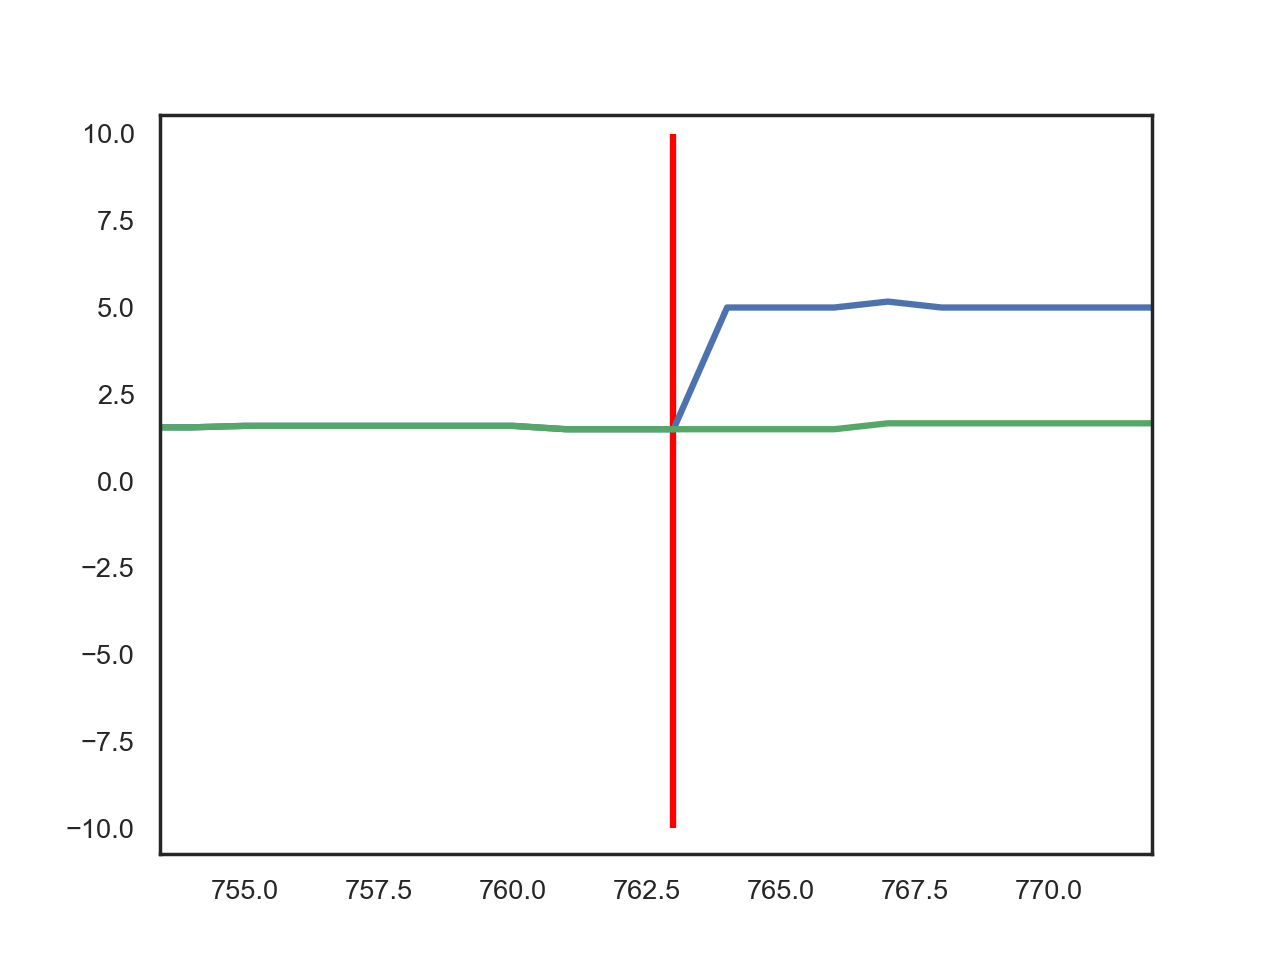

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-15 13:46:59.746364. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [29]:
f, ax = plt.subplots()
ax.plot(R.cursor_pos[:, 0])
ax.plot(R.dec_state_mn['all'][:, 0])

obs_pen = np.nonzero(hdf.root.task_msgs[:]['msg'] == 'premove')[0]
obs_tm =hdf.root.task_msgs[obs_pen]['time']
ax.vlines(obs_tm, -10, 10, 'r')

# ax.plot(R.cursor_vel[:, 0])
# ax.plot(R.dec_state_mn['all'][:, 3])

In [24]:
obs_tm

array([   702,   1566,   1788,   1968,   2160,   2640,   3546,   3672,
         3810,   4134,   4350,   4956,   6582,   6726,   8400,   9318,
         9438,   9569,   9756,   9906,  10554,  10721,  10944,  11172,
        11430,  11574,  11700,  11856,  15156,  15786,  16602,  16818,
        17256,  17796,  18030,  18276,  18389,  18498,  18618,  18750,
        19494,  19626,  19727,  19854,  19956,  20922,  21066,  21186,
        21300,  21456,  21582,  21750,  21912,  22050,  22176,  25962,
        26136,  26304,  26466,  29148,  29934,  30084,  30234,  30354,
        30546,  30906,  31056,  31206,  31380,  31524,  31998,  33390,
        33564,  34830,  35004,  35538,  35724,  35856,  36018,  36186,
        38994,  39138,  39324,  39528,  39816,  39942,  40062,  40830,
        40998,  41130,  41286,  41549,  42180,  42306,  42480,  42594,
        42876,  44724,  45924,  46158,  46296,  46428,  46667,  47376,
        47526,  47670,  47831,  47988,  48288,  48750,  48888,  48996,
      

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-15 13:40:34.305540. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [22]:
hdf.root.task_msgs

/task_msgs (Table(3236,), shuffle, zlib(5)) ''
  description := {
  "msg": StringCol(itemsize=256, shape=(), dflt='', pos=0),
  "time": UInt32Col(shape=(), dflt=0, pos=1)}
  byteorder := 'little'
  chunkshape := (252,)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-15 13:39:29.265325. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [8]:
for i in [0, 2]:
    ### Pos ###
    _,_,rv_pos,_,_= scipy.stats.linregress(np.squeeze(R.cursor_pos[:, i]), R.dec_state_mn['all'][:, i])
    ### Vel ###
    _,_,rv_vel,_,_= scipy.stats.linregress(np.squeeze(R.cursor_vel[:, i]), R.dec_state_mn['all'][:, i+3])
    
    print('Pos %d, rv=%.10f'%(i, rv_pos))
    print('Vel %d, rv=%.10f'%(i, rv_vel))

Pos 0, rv=0.9522941122
Vel 0, rv=0.9966581392
Pos 2, rv=0.9548179975
Vel 2, rv=0.9915405857


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-15 13:31:32.445470. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [186]:
###
rew_ix2 = np.nonzero(hdf.root.task_msgs[:]['msg']=='reward')[0]
go_ix2 = rew_ix2.copy() - 3

rew_ix = hdf.root.task_msgs[rew_ix2]['time']
go_ix = hdf.root.task_msgs[go_ix2]['time']
F, KG, P = dec.filt.get_sskf(return_P=True)
update_bmi_ix = R.update_bmi_ix;
key = 'spike_counts'

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 22:11:06.889096. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [137]:
A = dec.filt.A
W = dec.filt.W
P = np.mat(np.zeros((7, 7)))

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 21:46:08.104758. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [142]:
for i in range(1000):
    P = A*P*A.T + W 

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 21:46:15.647856. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [143]:
import prelim_analysis as pa
bin_spk, targ_i_all, targ_ix, trial_ix_all, decoder_all = pa.extract_trials_all(hdf, rew_ix, 
                    drives_neurons_ix0=None, update_bmi_ix =update_bmi_ix, hdf_key=key, keep_trials_sep=True,
                    reach_tm_is_hdf_cursor_pos=False, reach_tm_is_kg_vel=True, **dict(kalman_gain=KG))

(177,) (177,) (34, 18) 6 (34,)
[-1.]


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 21:46:19.216837. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [255]:
commands = []; 
bin_spk_z = []; 
bin_num = []
rev_bin_num = []; 
target = []; 
Xt = []
Xtm1 = []; 

for ib, b in enumerate(bin_spk):
    zsc = b - dec.mFR[np.newaxis, :] / dec.sdFR[np.newaxis, :]
    commands.append(np.dot(KG, zsc.T).T)
    bin_spk_z.append(b)
    bin_num.append(np.arange(b.shape[0]))
    rev_bin_num.append(np.arange(b.shape[0])[::-1])
    target.append(np.zeros((b.shape[0])) + hdf.root.task[rew_ix[ib]-10]['target_ID'])
    Xt.append(b[1:, :])
    Xtm1.append(b[:-1, :])

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 22:56:56.420230. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [256]:
C = np.vstack((commands))

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 22:56:59.701585. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [257]:
mag = np.sqrt(C[:, 3]**2 + C[:, 5]**2)
boundaries = [np.percentile(mag, 23.75), np.percentile(mag, 47.5), np.percentile(mag, 71.25), np.percentile(mag, 95)]

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 22:57:01.070905. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [258]:
boundaries

[2.0717724406116838, 3.5937364896866866, 5.513134510088081, 9.688449803787378]

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 22:57:02.562321. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [116]:
#dec = pickle.load(open('grom20160302_02_RMLC03021529.pkl'))
#F,KG,P = dec.filt.get_sskf(return_P=True)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 21:41:37.846621. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [259]:
from online_analysis import util_fcns
boundaries_all = dict()
boundaries_all['home', 0] = boundaries
command_bins = util_fcns.commands2bins(commands, boundaries_all, 'home', 0, 
                                               vel_ix=[3, 5])

spks = np.vstack((bin_spk_z))
push = np.vstack((commands))
trg = np.hstack((target))
tsk = np.zeros((spks.shape[0]))
bin_num = np.hstack((bin_num))
rev_bin_num = np.hstack((rev_bin_num))


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 22:57:04.910808. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



<IPython.core.display.Javascript object>


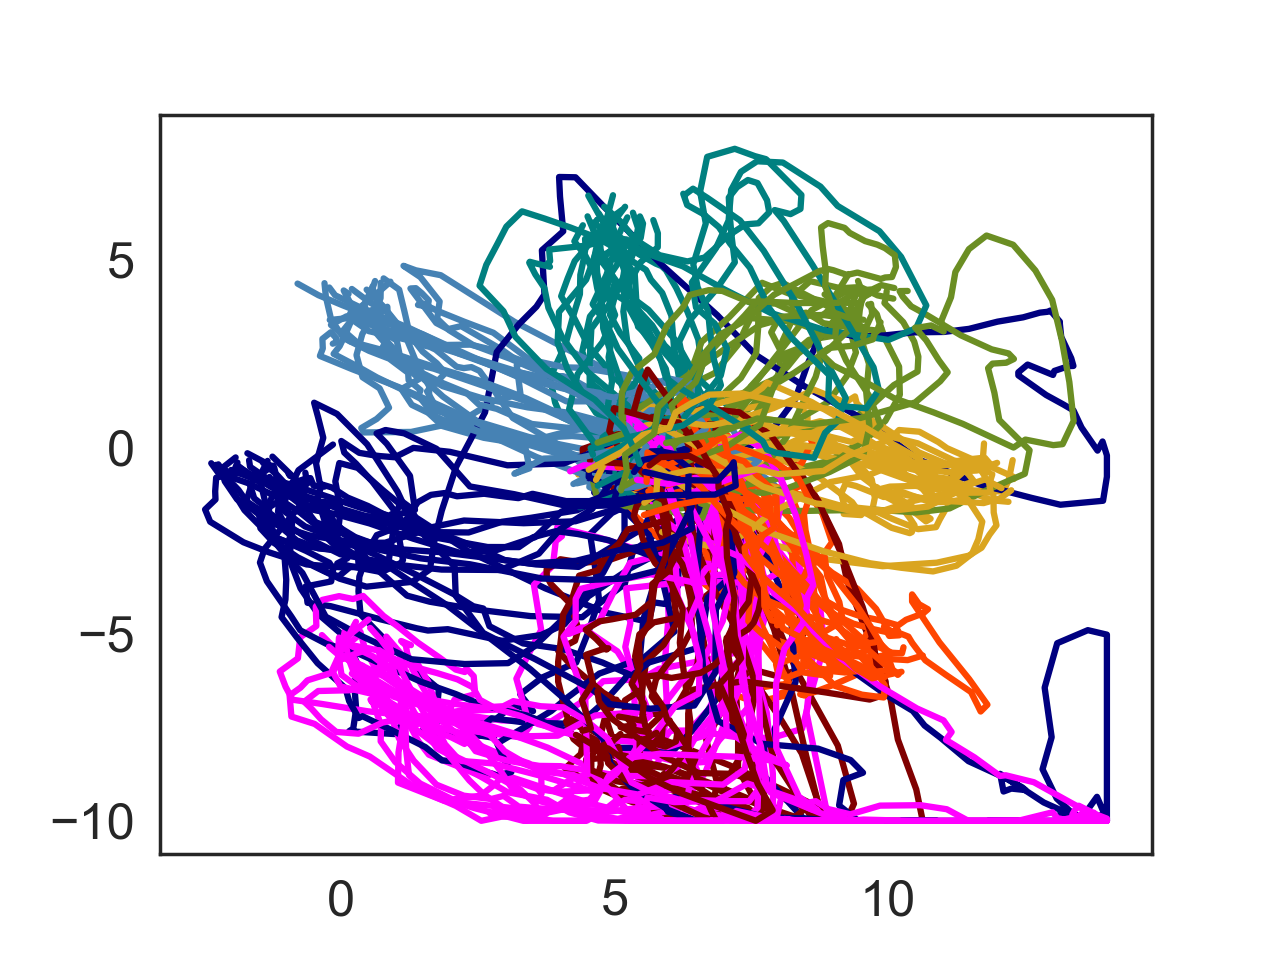

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 22:57:05.732788. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [260]:
f, ax = plt.subplots()
cmap = ['', 'maroon', 'orangered', 'goldenrod', 'olivedrab', 'teal', 'steelblue', 'navy', 'magenta', 'gray']
for ir, (go, rew) in enumerate(zip(go_ix, rew_ix)):
    c = hdf.root.task[go:rew]['cursor']
    ax.plot(c[:, 0], c[:, 2], '-', color=cmap[int(target[ir][0])])
    

In [261]:
from online_analysis import plot_fr_diffs
perc_sig, perc_sig_vect, niter2match, pooled_stats = get_stuff(spks, push, tsk, trg, bin_num, rev_bin_num, tsk+trg-1,
                                                              None, boundaries_all, )

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:122: RuntimeWarning: invalid value encountered in double_scalars

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 22:57:15.779957. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [262]:
def get_stuff(spks, push, tsk, trg, bin_num, rev_bin_num, move, dat, mag_boundaries, 
              animal='home', day_ix = 0, min_bin_indices=8, nshuffs = 50):
    ### Dictionaries to hold the pvalues and effect sizes of the signfiicant and non-sig 
    perc_sig = {}; 
    perc_sig_vect = {}; 

    dtype_su = [('pv', float), ('abs_diff_fr', float), ('frac_diff_fr', float), ('glob_fr', float)]
    dtype_pop = [('pv', float), ('norm_diff_fr', float), ('frac_norm_diff_fr', float)]

    niter2match = {}

    pooled_stats = {}
    
    
    ### Setup the dictionaries for this animal and date
    perc_sig[animal, day_ix] = {}
    perc_sig_vect[animal, day_ix] = {}
    niter2match[animal, day_ix] = {}

    pooled_stats[animal, day_ix] = []

    ### Pull data ### 
    nneur = spks.shape[1]
    command_bins = util_fcns.commands2bins([push], mag_boundaries, animal, day_ix, 
                               vel_ix=[3, 5])[0]

    #### Add this for easier analysis later 
    perc_sig[animal, day_ix, 'nneur'] = nneur

    ### For each command get: ###
    for mag in range(4):

        for ang in range(8): 

            #### Common indices 
            #### Get the indices for command ####
            ix_com = plot_fr_diffs.return_command_indices(bin_num, rev_bin_num, push, mag_boundaries, mag=mag, ang=ang,
                                   animal=animal, day_ix=day_ix, min_bin_num=min_bin_indices,
                                   min_rev_bin_num=min_bin_indices)

            ix_com_global = []
            global_comm_indices = {}

            #### Go through the movements ####
            for mov in np.unique(move[ix_com]):

                ### Movement specific command indices 
                ix_mc = np.nonzero(move[ix_com] == mov)[0]
                ix_mc_all = ix_com[ix_mc]

                ### If enough of these then proceed; 
                if len(ix_mc) >= 15:    

                    global_comm_indices[mov] = ix_mc_all
                    ix_com_global.append(ix_mc_all)

            if len(ix_com_global) > 0:
                ix_com_global = np.hstack((ix_com_global))


                ### ONly command, only movs we want: ####
                assert(np.all(command_bins[ix_com_global, 0] == mag))
                assert(np.all(command_bins[ix_com_global, 1] == ang))
                assert(np.all(np.array([move[i] in global_comm_indices.keys() for i in ix_com_global])))

                ### Iterate through the moves we want 
                for mov in global_comm_indices.keys(): 

                    perc_sig[animal, day_ix][mag, ang, mov] = []

                    ### get indices #### 
                    ix_mc_all = global_comm_indices[mov]
                    Ncommand_mov = len(ix_mc_all)

                    ### FR for neuron ### 
                    mov_mean_FR = np.mean(spks[ix_mc_all, :], axis=0)

                    ### Figure out which of the "ix_com" indices can be used for shuffling for this movement 
                    ix_ok, niter = plot_fr_diffs.distribution_match_global_mov(push[np.ix_(ix_mc_all, [3, 5])], 
                                                 push[np.ix_(ix_com_global, [3, 5])])
                    niter2match[animal, day_ix][mag, ang, mov] = niter 

                    ### which indices we can use in global distribution for this shuffle ----> #### 
                    ix_com_global_ok = ix_com_global[ix_ok] 
                    assert(np.all(command_bins[ix_com_global_ok, 0] == mag))
                    assert(np.all(command_bins[ix_com_global_ok, 1] == ang))
                    assert(np.all(np.array([move[i] in global_comm_indices.keys() for i in ix_com_global_ok])))
                    Nglobal = len(ix_com_global_ok)

                    ### Use this as global mean for this movement #####
                    global_mean_FR = np.mean(spks[ix_com_global_ok, :], axis=0)

                    ### Get difference now: 
                    dmean_FR = np.abs(mov_mean_FR - global_mean_FR)

                    ### Get shuffled differences saved; 
                    dmFR_shuffle = []; ## Absolute differences from global 
                    mFR_shuffle = [] ### Just shuffled mFR 

                    for i_shuff in range(nshuffs):
                        ix_sub = np.random.permutation(Nglobal)[:Ncommand_mov]
                        mn_tmp = np.mean(spks[ix_com_global_ok[ix_sub], :], axis=0)

                        dmFR_shuffle.append(np.abs(mn_tmp - global_mean_FR))
                        mFR_shuffle.append(mn_tmp)

                    ### Stack ####
                    dmFR_shuffle = np.vstack((dmFR_shuffle))
                    mFR_shuffle = np.vstack((mFR_shuffle))

                    pooled_stats[animal, day_ix].append([dmean_FR, dmFR_shuffle])

                    ### For each neuron go through and do the signficiance test ####
                    for i_neur in range(nneur):

                        ### Find differences that are greater than shuffle 
                        n_lte = len(np.nonzero(dmFR_shuffle[:, i_neur] >= dmean_FR[i_neur])[0])
                        pv = float(n_lte) / float(nshuffs)

                        ### find difference from the global mean 
                        dFR = np.abs(mov_mean_FR[i_neur] - global_mean_FR[i_neur])
                        perc_sig[animal, day_ix][mag, ang, mov].append(np.array((pv, dFR, dFR/global_mean_FR[i_neur], global_mean_FR[i_neur]), dtype=dtype_su))

                    #### Vector #####
                    n_lte = len(np.nonzero(np.linalg.norm(dmFR_shuffle, axis=1) >= np.linalg.norm(dmean_FR))[0])
                    pv = float(n_lte) / float(nshuffs)
                    dist = np.linalg.norm(mov_mean_FR - global_mean_FR)

                    ### Make sure this is the same thign ###
                    assert(dist == np.linalg.norm(dmean_FR))

                    ### Fraction difference; 
                    perc_sig_vect[animal, day_ix][mag, ang, mov] = np.array((pv, dist/nneur, dist/np.linalg.norm(global_mean_FR)), dtype=dtype_pop)
    return perc_sig, perc_sig_vect, niter2match, pooled_stats


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 22:57:17.235258. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [263]:
reload(plot_fr_diffs)

<module 'online_analysis.plot_fr_diffs' from 'online_analysis/plot_fr_diffs.pyc'>

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 22:57:18.192841. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



<IPython.core.display.Javascript object>


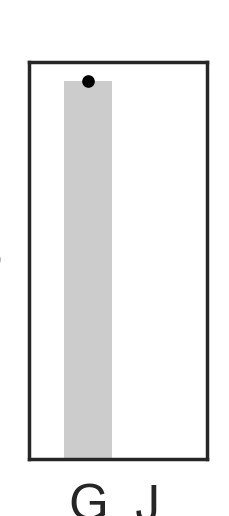

<IPython.core.display.Javascript object>


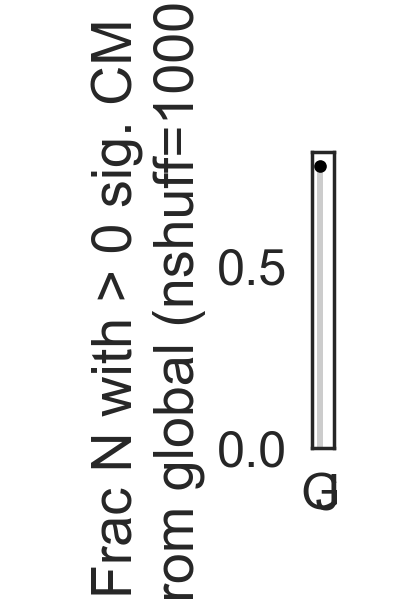

<IPython.core.display.Javascript object>


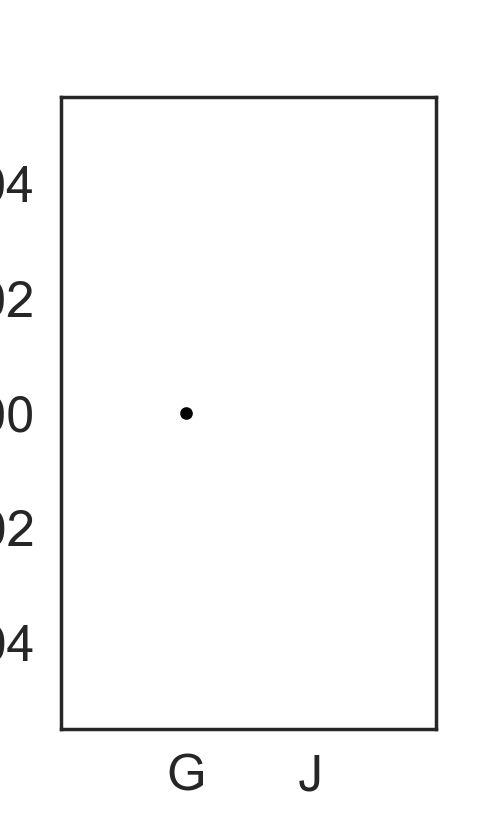

<IPython.core.display.Javascript object>


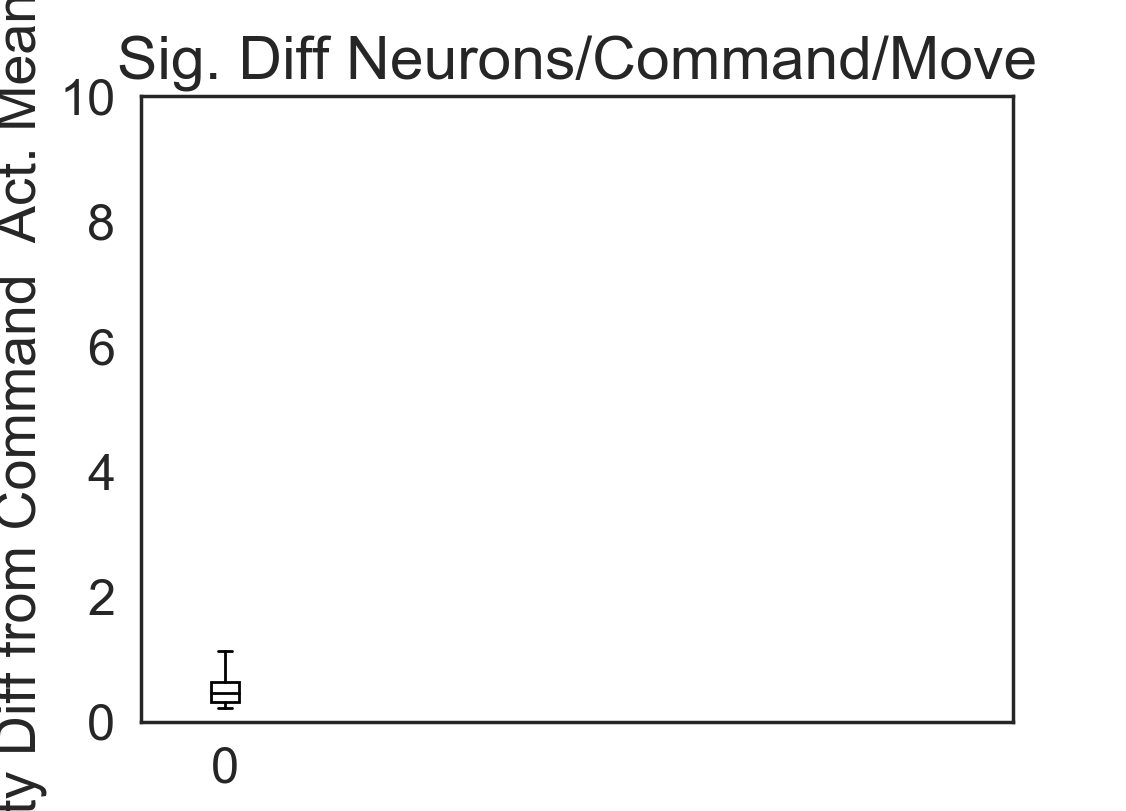

<IPython.core.display.Javascript object>


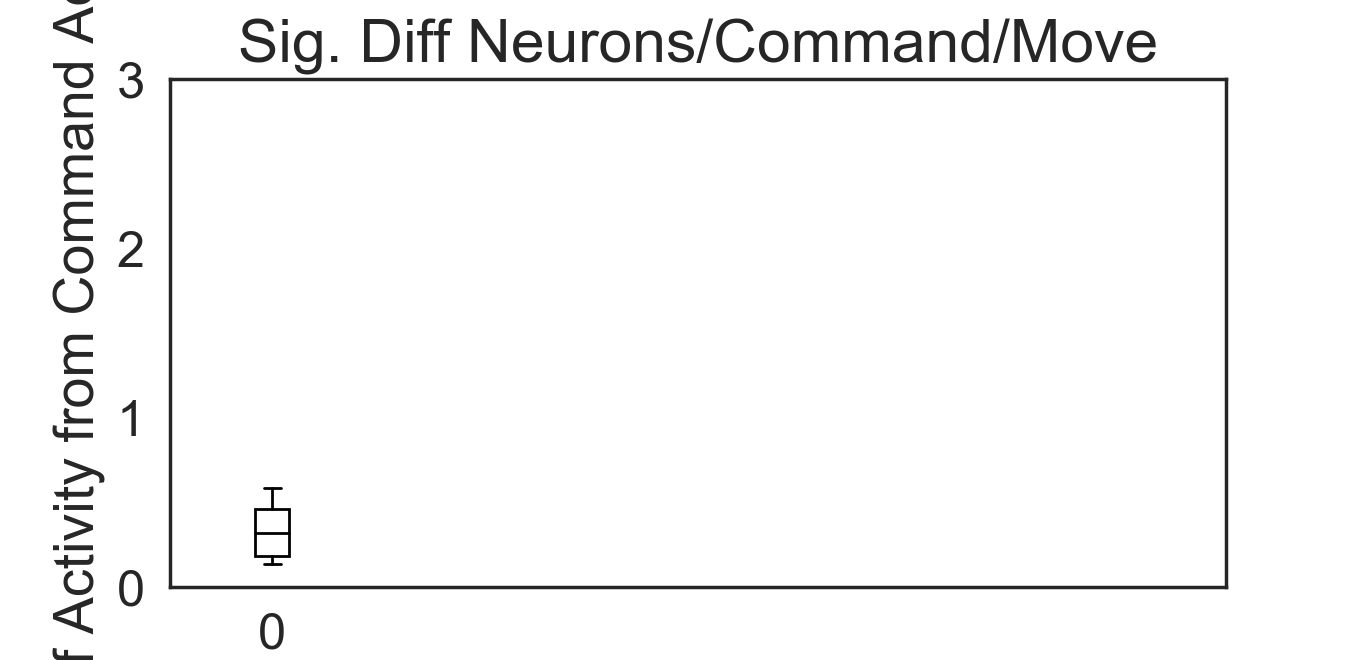

<IPython.core.display.Javascript object>


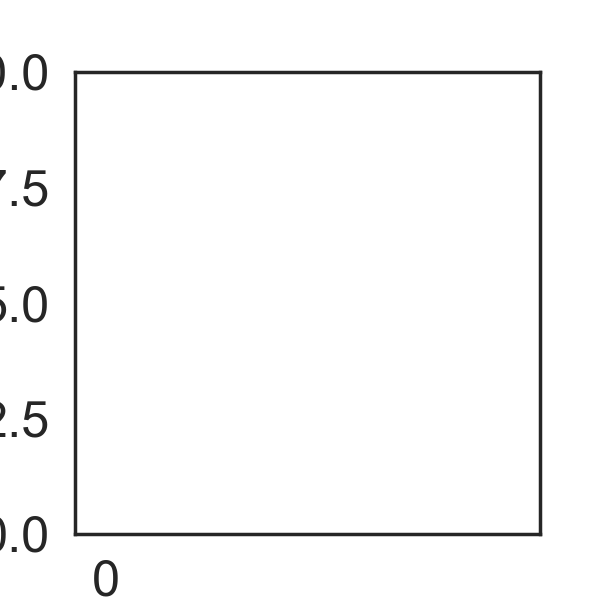

<IPython.core.display.Javascript object>


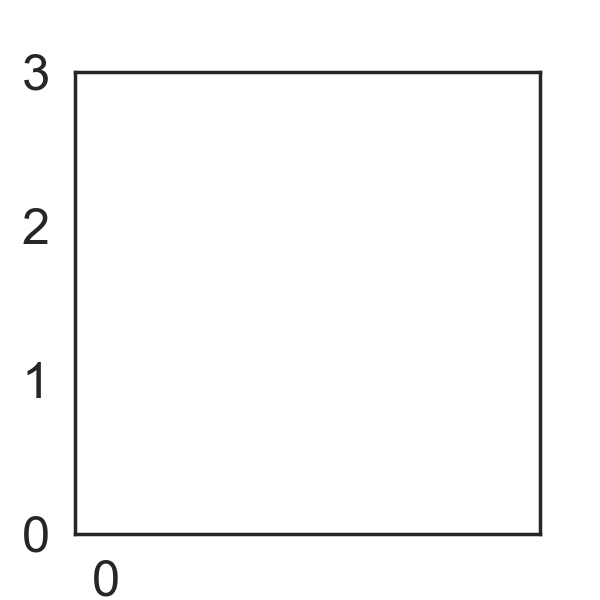

<IPython.core.display.Javascript object>


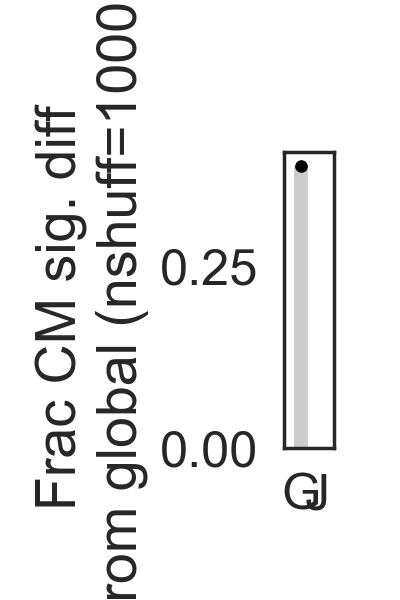

<IPython.core.display.Javascript object>


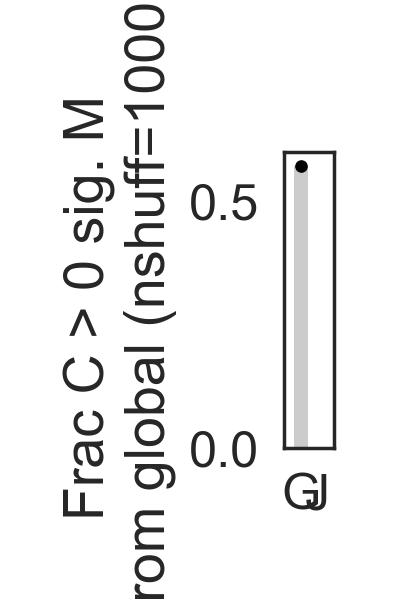

<IPython.core.display.Javascript object>


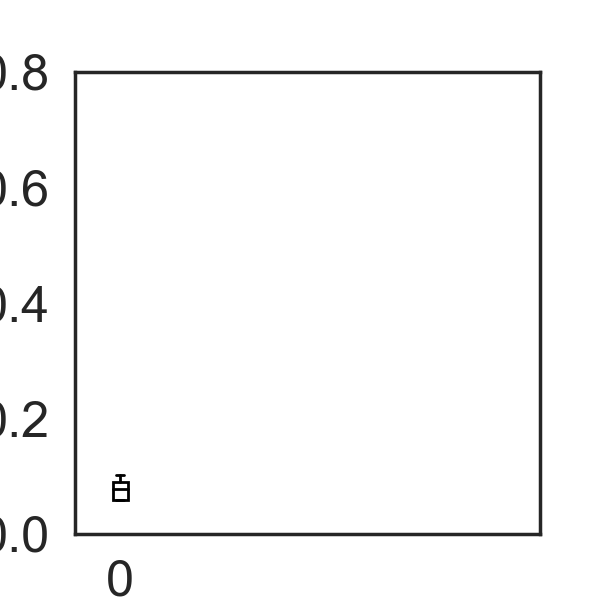

<IPython.core.display.Javascript object>


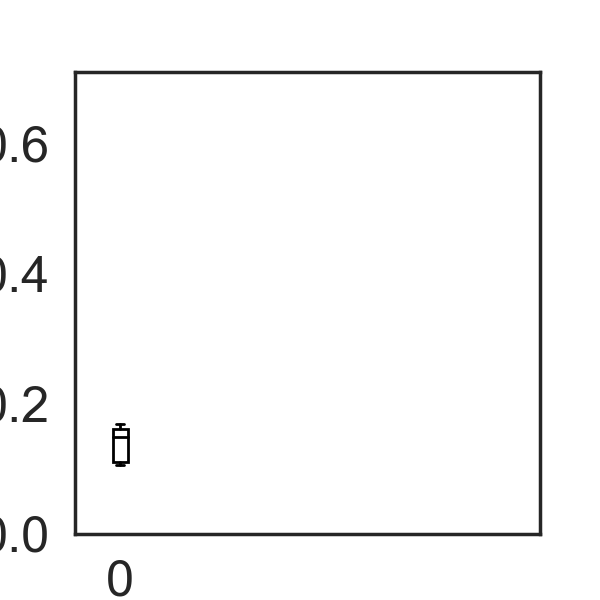

<IPython.core.display.Javascript object>


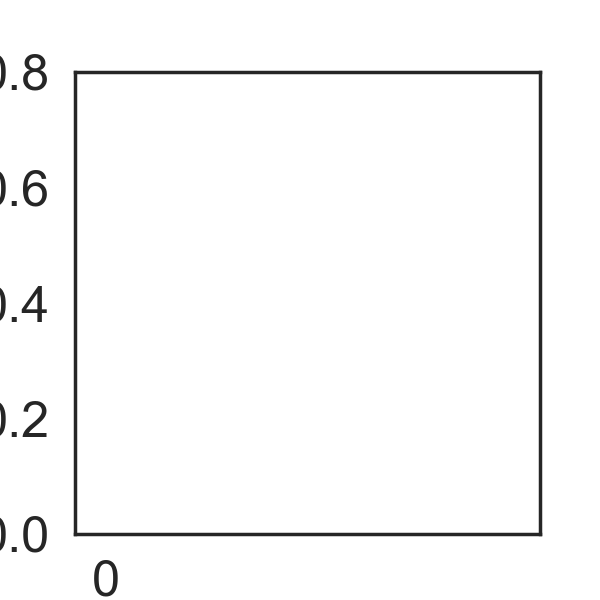

<IPython.core.display.Javascript object>


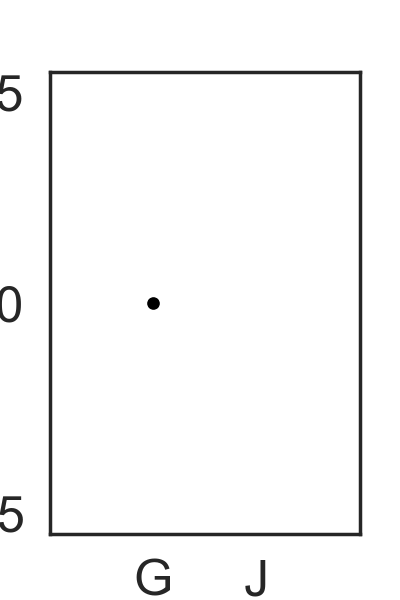

A home, D 0, perc sig. tot 7/18  =0.39
A home, D 0, perc sig. of beh sig 0/0  =0.00


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 22:57:19.379138. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [264]:
plot_fr_diffs.plot_su_pop_stats(perc_sig, perc_sig_vect)

In [265]:
### R2 of dynamics;
Xt = np.vstack((Xt))
Xtm1 = np.vstack((Xtm1))

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 22:57:46.744016. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [266]:
from sklearn.linear_model import Ridge
alpha = 0
T = Xtm1.shape[0]
for i in range(5): 
    ix_test = np.arange(int(T/5.*i), int(T/5.*(i+1)))
    ix_train = np.array([j for j in range(T) if j not in ix_test])
    model_2 = Ridge(alpha=alpha, fit_intercept=True)
    model_2.fit(Xtm1[ix_train, :], Xt[ix_train, :]);
    Xt_pred = model_2.predict(Xtm1[ix_test, :])
    r2 = util_fcns.get_R2(Xt[ix_test, :], Xt_pred)
    print(r2)

0.3251605670531613
0.31078882000523467
0.33242196382663847
0.3338707363026908
0.29617585231072696


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 22:57:47.849512. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [269]:
A = model_2.coef_

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 22:57:59.346324. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [270]:
ev_sort, _ = np.linalg.eig(A)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 22:57:59.944247. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [303]:
dt = .1
Tau = -1./np.log(np.abs(ev_sort))*dt*1000. 

## Get angs of A matrix eigenvalues
angs = np.array([ np.arctan2(np.imag(ev_sort[i]), np.real(ev_sort[i])) for i in range(len(ev_sort))])
angs[angs==np.pi] = 0.
angs = np.abs(angs)/(2*np.pi*.1)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-09 01:46:36.182017. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



<IPython.core.display.Javascript object>


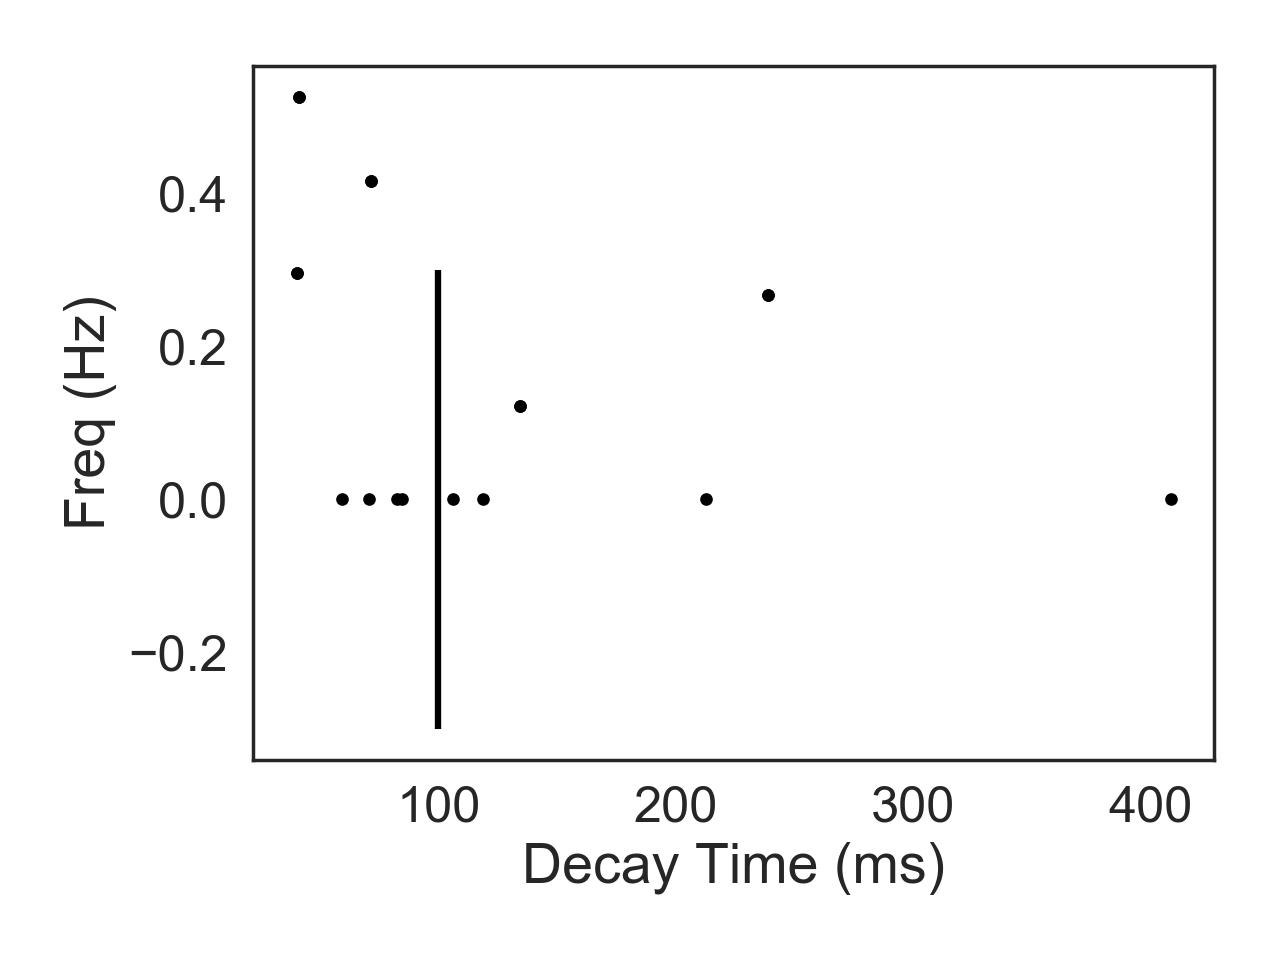

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-09 01:46:36.755266. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [304]:
f, ax = plt.subplots()
plt.plot(Tau, angs, 'k.')
plt.vlines(100, -.3, .3, 'k')
plt.xlabel('Decay Time (ms)')
plt.ylabel('Freq (Hz)')
plt.tight_layout()

matrix([[ 9.30662201e-01,  1.12404775e-01,  2.54276282e-02,
          5.44871540e-03, -4.42840866e-03,  1.23788419e-01,
          8.72269425e-02, -7.93321313e-02,  7.35071083e-03,
          9.44645791e-02, -5.38100939e-02,  6.32336046e-02,
          1.06172693e-01,  1.25210976e-01,  1.95911604e-02,
          3.26494282e-03,  9.61357314e-02,  5.93304100e-02],
        [ 1.12404775e-01,  9.94945720e-01,  1.21560306e-01,
          6.05431706e-02,  7.69219019e-02, -1.79283619e-02,
          5.03106938e-02, -4.45077099e-02,  5.65162920e-02,
          1.22383238e-01,  1.49606737e-02, -1.03604938e-03,
          9.59374977e-03,  8.22009171e-02,  8.71582927e-02,
         -6.26156439e-02,  6.79014971e-02,  9.51462510e-02],
        [ 2.54276282e-02,  1.21560306e-01,  9.24470286e-01,
          1.70077263e-01,  2.61078897e-01,  2.54155651e-02,
          7.15330813e-02, -1.13786512e-01,  6.08049628e-02,
          8.75651337e-02,  2.11344414e-02,  1.40153973e-02,
          1.50377187e-02,  2.15104743e

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 23:23:06.901412. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [282]:

decg = pickle.load(open('grom20160302_02_RMLC03021529.pkl'))
Fg,KGg,Pg = decg.filt.get_sskf(return_P=True)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 23:23:50.121137. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [281]:
cd '/Users/preeyakhanna/Dropbox/TimeMachineBackups/grom2016/'

/Users/preeyakhanna/Dropbox/TimeMachineBackups/grom2016


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 23:23:48.434983. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



<IPython.core.display.Javascript object>


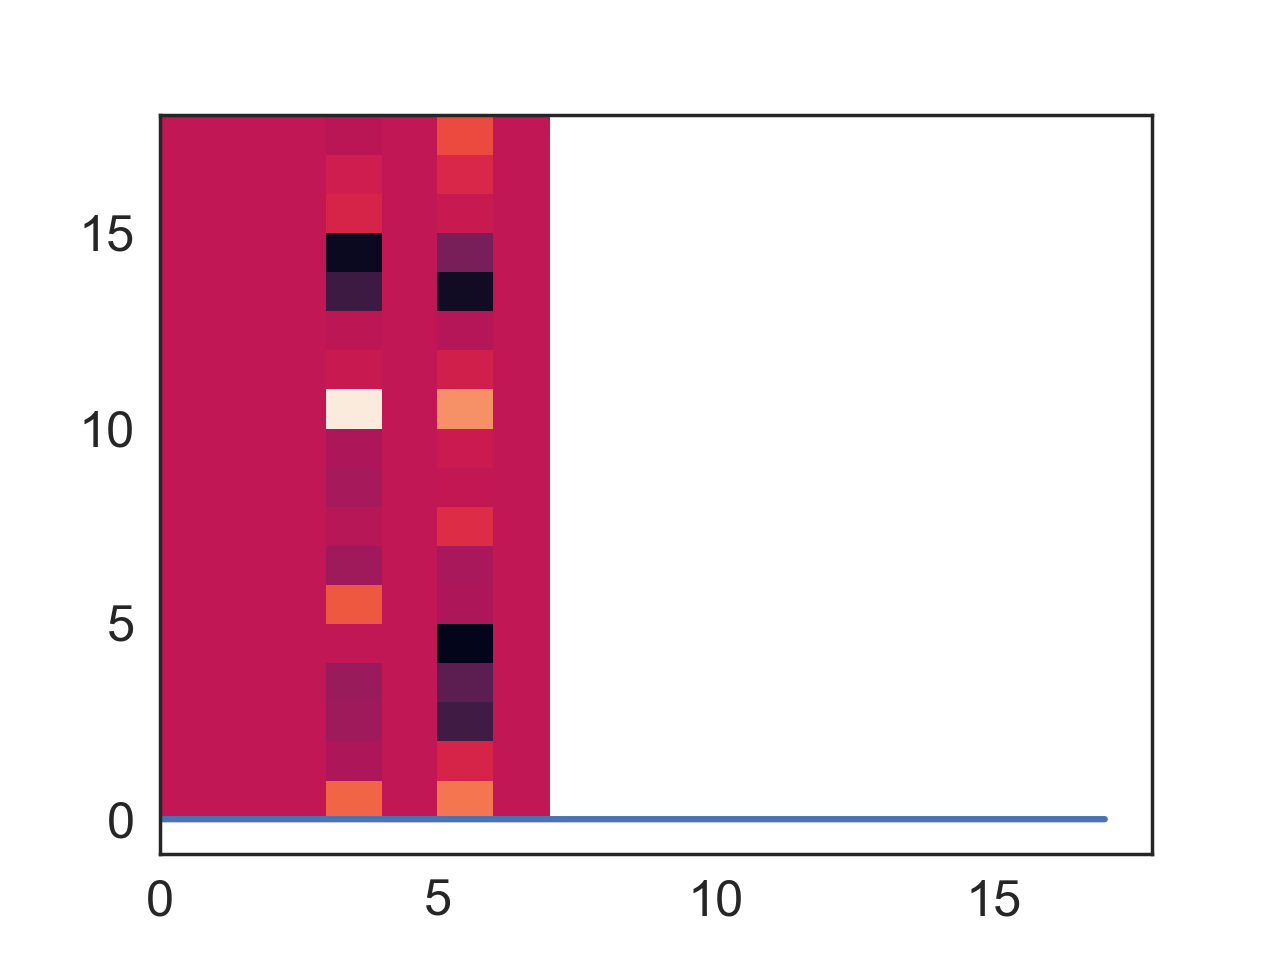

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 23:24:36.958657. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [292]:
f, ax = plt.subplots()
plt.pcolormesh(np.array(dec.filt.C[:, :]))

<IPython.core.display.Javascript object>


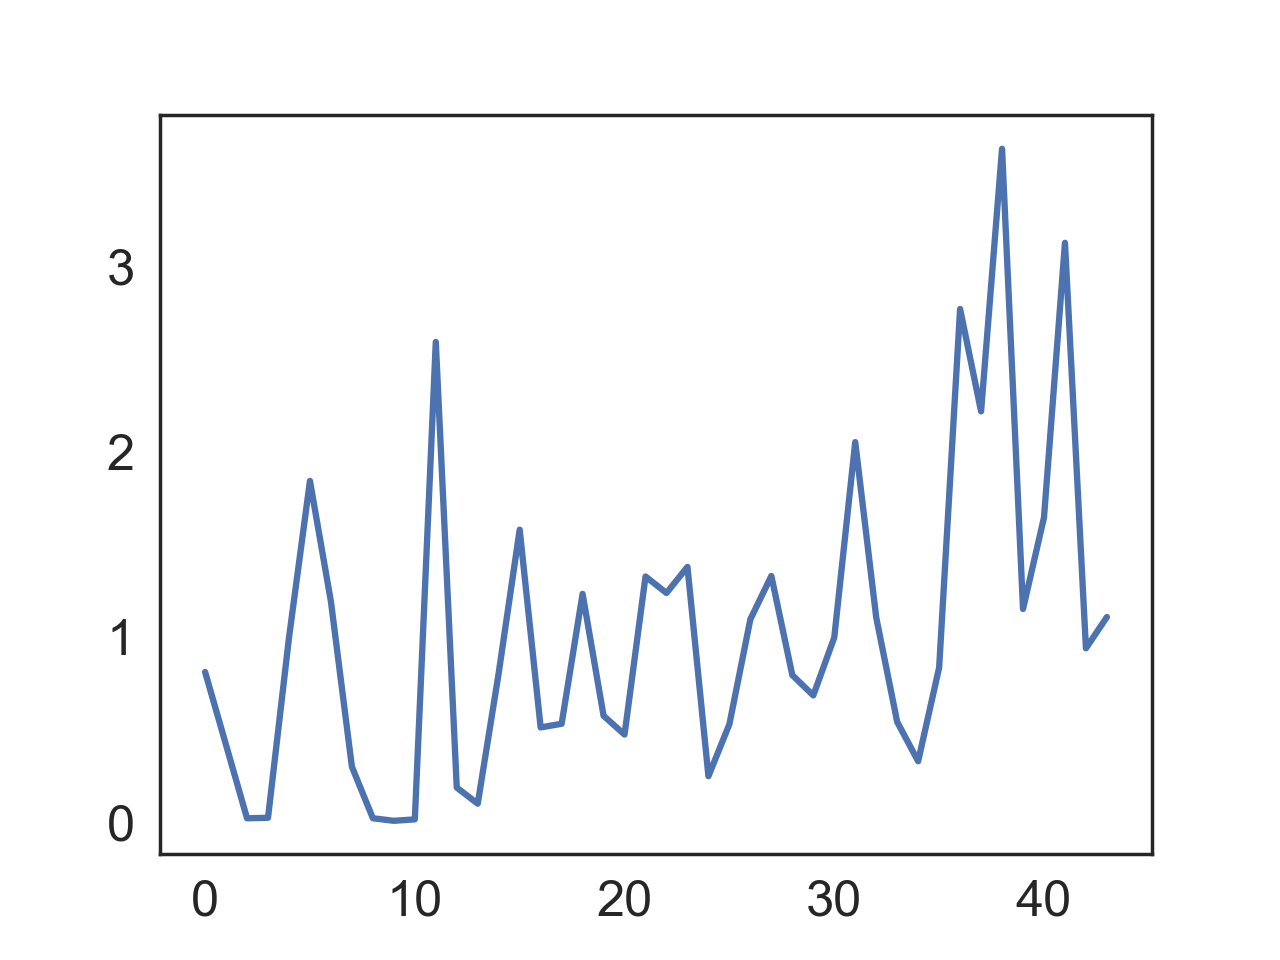

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-07 23:25:03.618453. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [295]:
f, ax = plt.subplots()
plt.plot(decg.filt.C[:, -1])

<IPython.core.display.Javascript object>


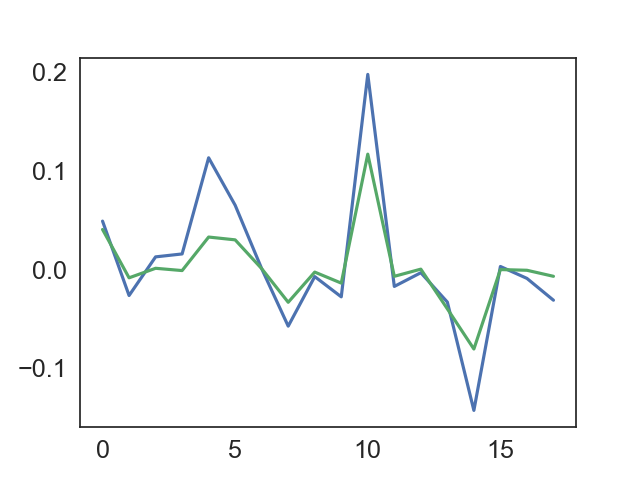

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-08 08:41:09.224700. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [297]:
f, ax = plt.subplots()
ax.plot(KG[0, :])
ax.plot(KG[3, :]/10.)

In [298]:
slp,int,rv,_,_ = scipy.stats.linregress(KG[0, :], KG[3, :])

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-08 08:41:35.482782. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [300]:
slp

5.3828387653192085

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2021-03-08 08:41:46.607626. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)

